In [37]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df = df.drop_duplicates()


In [4]:
df['cholesterol'] = df["cholesterol"].apply(lambda x: x if x != 0 else None)


In [5]:
target = df["target"]

In [6]:
df.drop("cholesterol", axis=1, inplace=True)


In [7]:
features = df.drop("target", axis=1)
features


,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,0,0,172,0,0.0,1
1,49,0,3,160,0,0,156,0,1.0,2
2,37,1,2,130,0,1,98,0,0.0,1
3,48,0,4,138,0,0,108,1,1.5,2
4,54,1,3,150,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,0,0,132,0,1.2,2
1186,68,1,4,144,1,0,141,0,3.4,2
1187,57,1,4,130,0,0,115,1,1.2,2
1188,57,0,2,130,0,2,174,0,0.0,2


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standarised_df = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
standarised_df

,age,sex,chest pain type,resting bp s,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.433140,0.515952,-1.345086,0.410909,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.044591
1,-0.478484,-1.938163,-0.270422,1.491752,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.597420
2,-1.751359,0.515952,-1.345086,-0.129513,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.044591
3,-0.584556,-1.938163,0.804242,0.302825,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.597420
4,0.051881,0.515952,-0.270422,0.951331,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.044591
...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,-2.419749,-1.210356,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,0.597420
914,1.536902,0.515952,0.804242,0.627078,1.813758,-0.749180,0.164684,-0.823556,2.357094,0.597420
915,0.370100,0.515952,0.804242,-0.129513,-0.551341,-0.749180,-0.857069,1.214246,0.293283,0.597420
916,0.370100,-1.938163,-1.345086,-0.129513,-0.551341,1.733661,1.461525,-0.823556,-0.832432,0.597420


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standarised_df, target, test_size=0.2, random_state=0xc00ff3)



In [10]:
from sklearn.neighbors import KNeighborsClassifier

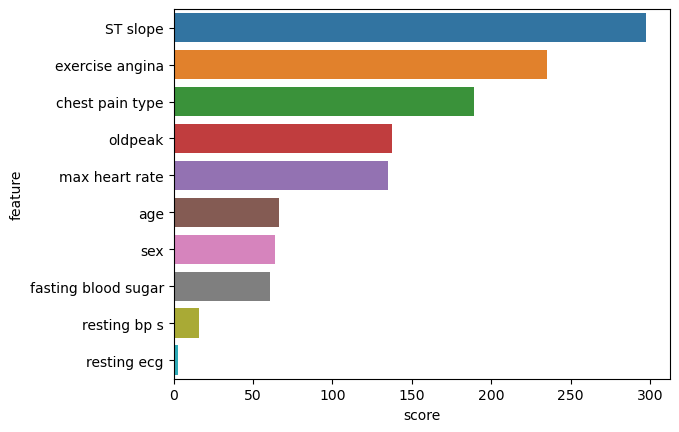

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest

select_k_best = SelectKBest().fit(X_train,y_train)

feature_scores = pd.DataFrame({"feature": X_train.columns, "score": select_k_best.scores_}).sort_values(by="score", ascending=False)
sns.barplot(feature_scores, y = "feature", x = "score")
plt.savefig("./images/sele.png", dpi=1000)

In [ ]:
# from itertools import product
# Ks = range(3,50,2)
# number_of_features = range(2,10)

# results = pd.DataFrame(product(Ks,number_of_features), columns=["neighbours", "features"]).set_index(["neighbours", "features"], drop=False)
# results["validation_score"] = np.nan
# avg_accuracies = []
# for k, best_features in product(Ks,number_of_features):
#     classifier = KNeighborsClassifier(n_neighbors=k)
#     cv_results = cross_validate(classifier, X_train[feature_scores.iloc[:best_features, 0]], y_train, cv=5)
#     results.at[(k,best_features), "validation_score"] = cv_results["test_score"].mean()

# results.to_csv("tmp.csv")


In [17]:
from plotnine import ggplot, geom_point, aes, scale_fill_brewer, coord_cartesian, xlab, ylab

ValueError: Length of values (10) does not match length of index (24)

/home/krzys/miniconda3/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


ValueError: Length of values (10) does not match length of index (24)

In [ ]:
range(3,12,2)sns.scatterplot(x=Ks, y = avg_accuracies)

In [43]:
Ks = range(3,50,2)

results = pd.DataFrame(Ks, columns=["neighbours"]).set_index("neighbours", drop=False)
results["validation_score"] = np.nan
for k  in Ks:
    classifier = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(classifier, X_train, y_train, cv=5)
    results.at[k, "validation_score"] = cv_results["test_score"].mean()

results.to_csv("tmp.csv")


In [29]:
g = (
    ggplot(results, aes(x="neighbours", y="validation_score")) 
    + geom_point()
    + coord_cartesian(
        ylim = (0.8, 0.86)
    )
    + xlab("Number of neighbors")
    + ylab("Accuracy")
)

g.save("./images/neigbours_acc.png", dpi=1000)# height=1000)


/home/krzys/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/krzys/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ./images/neigbours_acc.png


In [45]:
best_k = 19


In [46]:
number_of_features = range(2,10)

results = pd.DataFrame(number_of_features, columns=["features"]).set_index("features", drop=False)
results["validation_score"] = np.nan
for best_features in number_of_features:
    classifier = KNeighborsClassifier(n_neighbors=best_k)
    cv_results = cross_validate(classifier, X_train[feature_scores.iloc[:best_features, 0]], y_train, cv=5)
    results.at[best_features, "validation_score"] = cv_results["test_score"].mean()



/home/krzys/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/krzys/miniconda3/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ./images/features_acc.png


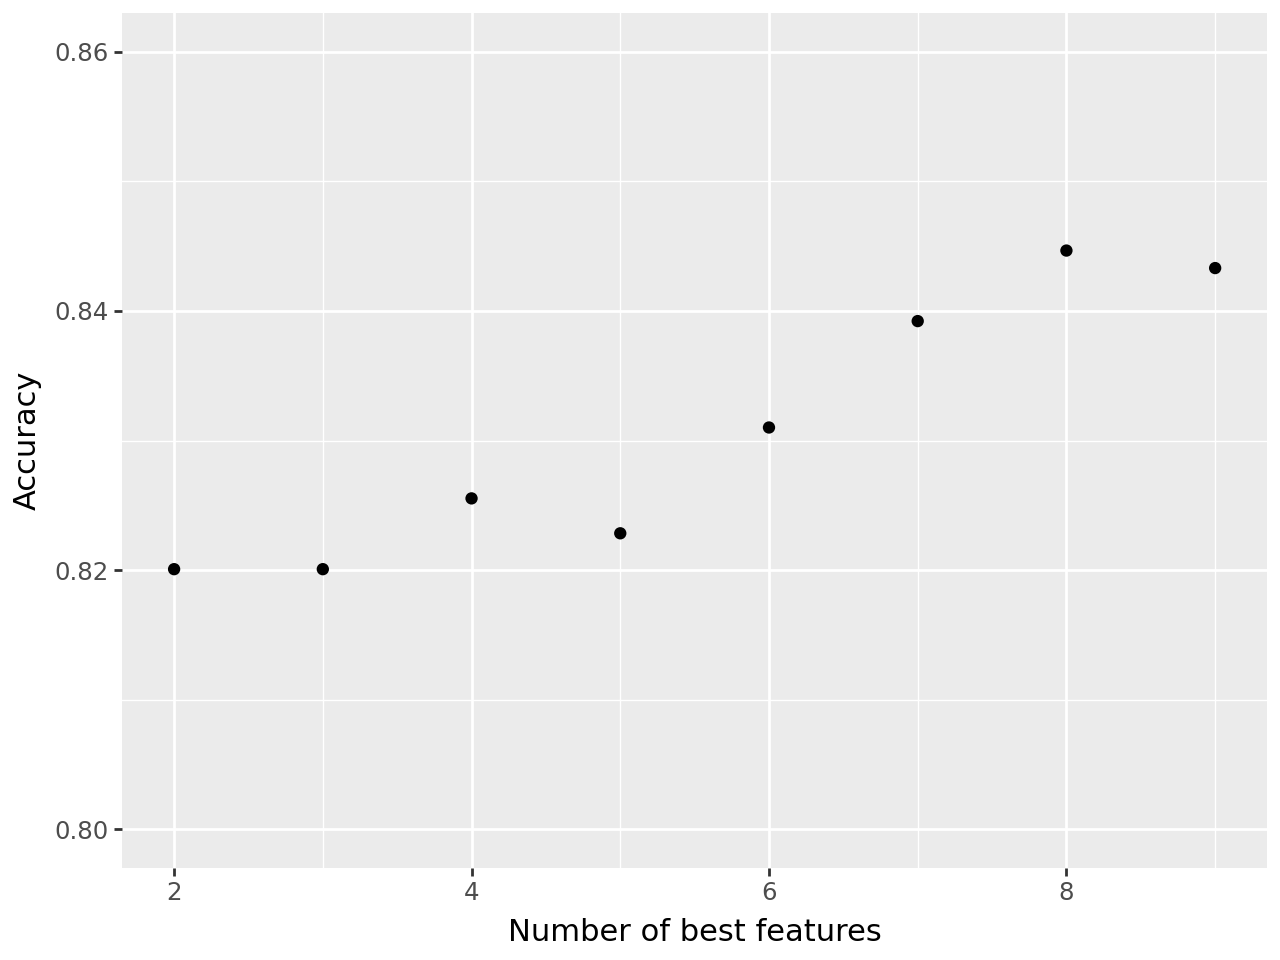

In [52]:
g = (
    ggplot(results, aes(x="features", y="validation_score")) 
    + geom_point()
    + coord_cartesian(
        ylim = (0.8, 0.86)
    )
    + xlab("Number of best features")
    + ylab("Accuracy")
)

g.save("./images/features_acc.png", dpi=1000)# height=1000)
g

In [53]:
selected_features_no = 8

In [54]:
selected_features = feature_scores.iloc[:selected_features_no, 0]
selected_features

9               ST slope
7        exercise angina
2        chest pain type
8                oldpeak
6         max heart rate
0                    age
1                    sex
4    fasting blood sugar
Name: feature, dtype: object

In [55]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train[selected_features], y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_predicted = knn.predict(X_test[selected_features])

cf_matrix = confusion_matrix(y_test,y_predicted)
accuracy_score(y_test,y_predicted)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap="Blues", fmt=".2%")